## harmpi analysis tutorial

the purpose of this tutorial is to get a first feeling for analyzing output of a numerical simulation

here we will use a harmpi magnetized torus run. please make sure you have the files dump000, dump100, gdump in the dumps/ folder and place this notebook in the main simulation directory (next to harm_script.py)

as we go, think about items marked "Q:", discuss with your neighbors, and ask for help at any step where you get stuck

first import some things -- **if it fails**, make sure harm_script.py is in the same directory and there are data files in a dumps/ directory

In [2]:
from __future__ import print_function
%matplotlib inline
%run -i harm_script.py
import matplotlib; matplotlib.rcParams['axes.unicode_minus']=False; matplotlib.rcParams['image.cmap']='inferno'
import matplotlib.pyplot as plt
import numpy as np
# make plots out to radius r=40 r_g
xr=40.

### read in the simulation grid file

the data are stored as arrays with 3 dimensions, corresponding to simulation coordinates x1,x2,x3<br>
variables are stored as arrays with dimensions (nx1,nx2,nx3)

### Q: why is our 3rd dimension of size 1?

In [3]:
rg("gdump")
print(np.shape(x1))

print(x1[:5,0,0])
print(x1[0,:5,0])

(256, 128, 1)
[0.2365692  0.26466212 0.29275507 0.32084802 0.34894094]
[0.2365692 0.2365692 0.2365692 0.2365692 0.2365692]


### read the dump file of the initial conditions

In [4]:
rd("dump000")

### harm_script.py has built in functions for making 2D contour plots
### Q: what variables did we make plots of? (refer to harmpi_tutorial.md for definitions)

Text(0, 0.5, '$z$ ($r_g$)')

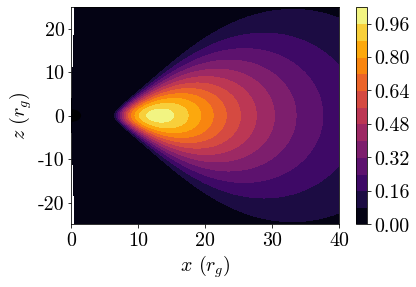

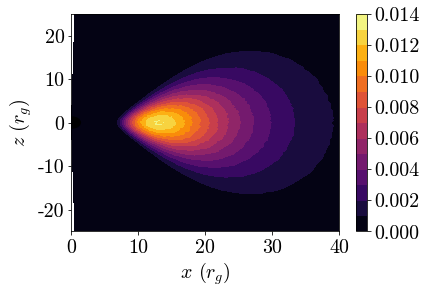

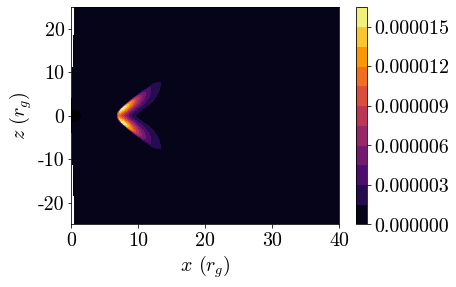

In [5]:
cs, cb = plco(rho,isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1)
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(ug,isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1)
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(bsq,isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1)
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')

### visualization is a key part of numerical simulation work! compare to different versions below

### Q: what is the difference? what do you think are the pros/cons?

harm_script.py:7: RuntimeWarning: divide by zero encountered in log10
  from matplotlib.patches import Ellipse


Text(0, 0.5, '$z$ ($r_g$)')

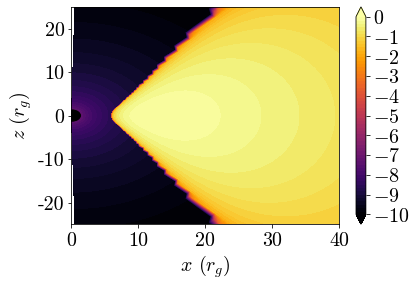

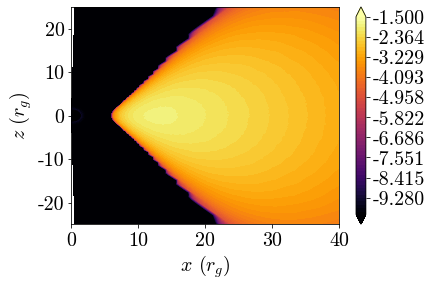

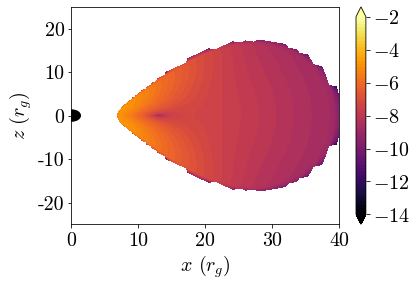

In [6]:
cs, cb = plco(np.log10(rho),isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1,levels=-10.+10*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(np.log10(ug),isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1,levels=-10.+8.5*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(np.log10(bsq),isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1,levels=-14.+12*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')

### Q: experiment on your own using the "plco" function in harm_script.py. enter one or more new plots in the blank line below.

### some first changes could be the plot bounds xmax, ymax; the contour levels defined by "levels", or try plotting a different variable from harmpi_tutorial.md

Text(0, 0.5, 'rho')

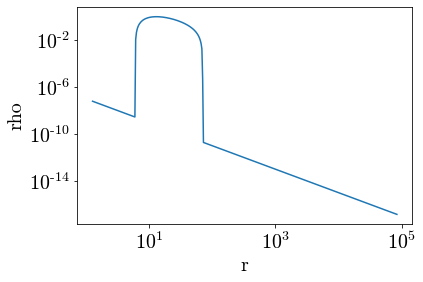

In [8]:
## ADD ONE OR MORE NEW PLOTS HERE!
plt.figure()
plt.loglog(r[:,ny//2,0], rho[:,ny//2,0])
plt.xlabel("r")
plt.ylabel("rho")

### quantitatively it's usually easier to look at 1D data, and as a result we want to do slicing or averaging

### Q: first, define a radius coordinate in 1D which has size nx1. Call it r1d and enter it in the line below.

In [20]:
# r[:, ny//2, 0]

In [19]:
r1d = r[:, ny//2, 0] ## ENTER HERE##

print(np.shape(r1d))
# did it work correctly? how could you check?

(256,)


### define a 1D slice through the equatorial plane

In [21]:
def midplane(x):
    return x[:,ny/2,0]

### define the integral over surface area ,\int dA, as a sum over angles on our grid, with dA in each cell related to the metric determinant gdet
### example: in flat space spherical coordinates, dA = r^2 sin theta

In [22]:
def sum_angles(x):
    return np.sum(np.sum(x*gdet,-1),-1)*_dx2*_dx3

### finally define a radial weighted average by the fluid mass density rho, xavg = Sum dA x rho / Sum dA rho
### Q: why might density-weighted averages might be useful? why or why not? talk to your neighbors!

In [23]:
def shell(x):
    return sum_angles(x*rho)/sum_angles(rho)

### the accretion rate is the inward mass flux as a function of radius, Mdot(r) = \int dA \rho u^r
### where u^r is the radial coordinate velocity as seen at infinity

Text(0, 0.5, 'accretion rate')

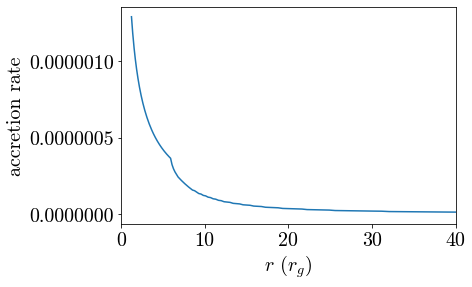

In [24]:
FM_000 = sum_angles(-rho*uu[1])
plt.plot(r1d,FM_000)
plt.xlim(0,xr)
plt.xlabel('$r$ ($r_g$)'); plt.ylabel('accretion rate')

### let's look at some average properties for the initial dump000
**Omega** = u^phi / u^t is the rotation frequency,<br>
**v^r** = u^r / u^t is a radial velocity

In [25]:
Omega_r_000=shell(uu[3]/uu[0])
vr_r_000=shell(uu[1]/uu[0])

### Q: how would you summarize the motion of the torus?

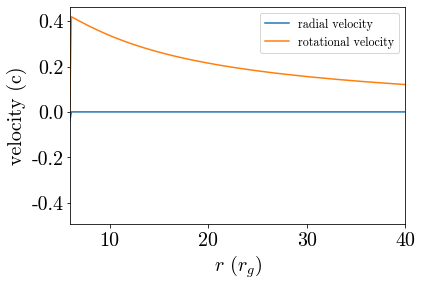

In [26]:
plt.plot(r1d,vr_r_000,label='radial velocity')
plt.plot(r1d,Omega_r_000*r1d,label='rotational velocity')
plt.xlim(6,xr)
plt.xlabel('$r$ ($r_g$)'); plt.ylabel('velocity (c)')
plt.legend(loc='upper right',fontsize=12)

### define some more quantities:
**pgas** is the gas pressure,<br>
**b^2** is the squared magnetic field strength,<br>
**beta** is the relative pressure contributed by gas and magnetic fields,<br>
**hr** is the scale height,

In [27]:
hr_000=np.sqrt(shell((r*np.cos(h))**2.))/r1d
pgas_r_000 = shell(ug*(gam-1.))
bsq_r_000 = shell(bsq)
beta_r_000 = pgas_r_000/bsq_r_000*2.

harm_script.py:4: RuntimeWarning: divide by zero encountered in true_divide
  


**beta ~ 1** means that the magnetic fields push back on the gas. usually we call this "strong" while **beta >> 1** means the field is weak.
### Q: by that definition, are the magnetic fields in our initial torus weak or strong?

(1.0, 1000000.0)

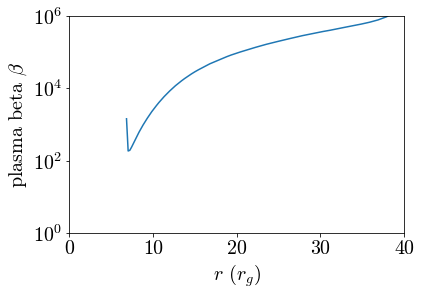

In [28]:
plt.semilogy(r1d,beta_r_000)
plt.xlabel(r'$r$ ($r_g$)'); plt.ylabel(r'plasma beta $\beta$')
plt.xlim(0,xr); plt.ylim(1.,1e6)

the scale height tells us how the material is distributed vertically, **h/r << 1 "thin"** or **h/r ~ 1 "thick"**
### Q: would you say our initial torus is geometrically thin or thick?

Text(0, 0.5, 'scale height $h/r$')

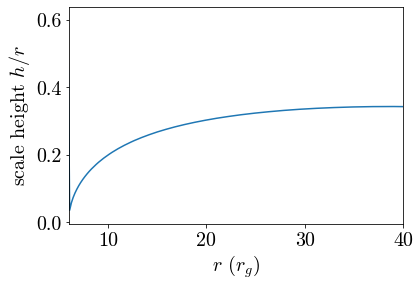

In [29]:
plt.plot(r1d,hr_000)
plt.xlim(6,xr)
plt.xlabel('$r$ ($r_g$)'); plt.ylabel('scale height $h/r$')

### now let's look at a later time step!

In [30]:
rd("dump100")

### what has **changed** by t = 1000 GM/c^3?

Text(0, 0.5, '$z$ ($r_g$)')

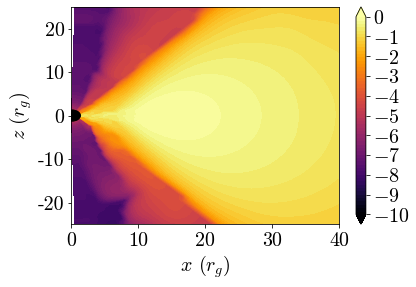

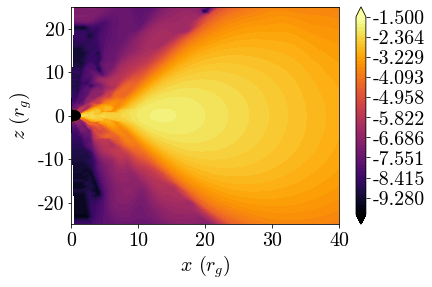

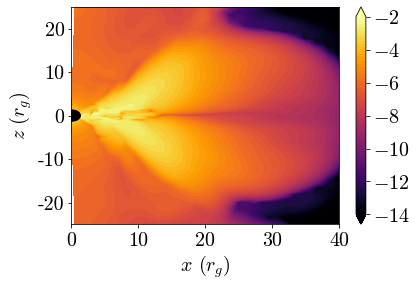

In [31]:
cs, cb = plco(np.log10(rho),isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1,levels=-10.+10*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(np.log10(ug),isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1,levels=-10.+8.5*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(np.log10(bsq),isfilled=1,k=0,xy=1,xmax=xr,ymax=25,dobh=1,cb=1,pretty=1,levels=-14.+12*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')

### now zoom in by changing the bounds of the plot xmax,ymax

### Q: what has changed by t=1000 GM/c^3?

Text(0, 0.5, '$z$ ($r_g$)')

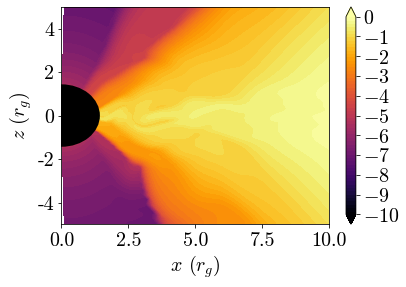

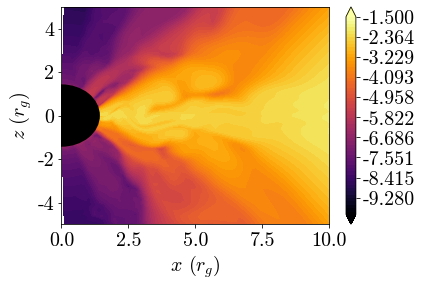

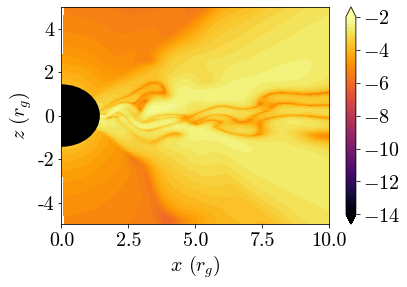

In [32]:
cs, cb = plco(np.log10(rho),isfilled=1,k=0,xy=1,xmax=10,ymax=5,dobh=1,cb=1,pretty=1,levels=-10.+10*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(np.log10(ug),isfilled=1,k=0,xy=1,xmax=10,ymax=5,dobh=1,cb=1,pretty=1,levels=-10.+8.5*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')
plt.figure()
cs, cb = plco(np.log10(bsq),isfilled=1,k=0,xy=1,xmax=10,ymax=5,dobh=1,cb=1,pretty=1,levels=-14.+12*np.arange(60)/59.,extend="both")
plt.xlabel('$x$ ($r_g$)'); plt.ylabel('$z$ ($r_g$)')

calculate the **inward mass flux** at this later time
### Q: where is material infalling or outflowing? is that what you expect? 
### Q: what about at the event horizon? is there gas falling onto the black hole?
the inward mass flux at the event horizon is called the **accretion rate**

Text(0, 0.5, 'inward radial mass flux')

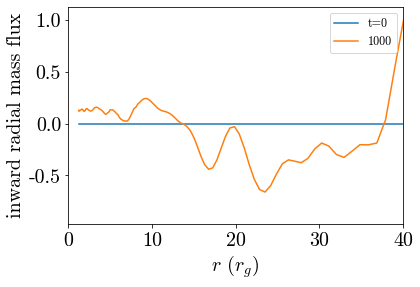

In [33]:
FM_100 = sum_angles(-rho*uu[1])
plt.plot(r1d,FM_000,label='t=0')
plt.plot(r1d,FM_100,label='1000')
plt.legend(fontsize=12)
plt.xlim(0,xr)
plt.xlabel(r'$r$ ($r_g$)'); plt.ylabel('inward radial mass flux')

re-calculate our averaged 1D quantities

In [34]:
hr_100=np.sqrt(shell((r*np.cos(h))**2.))/r1d
Omega_r_100=shell(uu[3]/uu[0])
vr_r_100=shell(uu[1]/uu[0])
pgas_r_100 = shell(ug*(gam-1.))
bsq_r_100 = shell(bsq)
beta_r_100 = pgas_r_100/bsq_r_100*2.

harm_script.py:6: RuntimeWarning: divide by zero encountered in true_divide
  from matplotlib import rc


### plot comparisons of b^2, beta between early and late time
### Q: how does the magnetic field strength compare?

Text(0, 0.5, 'plasma $\\beta$')

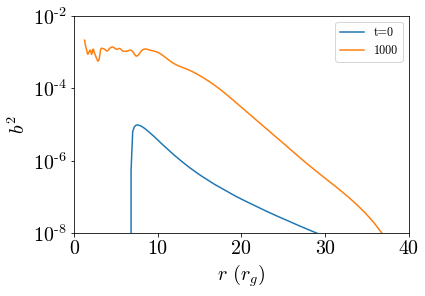

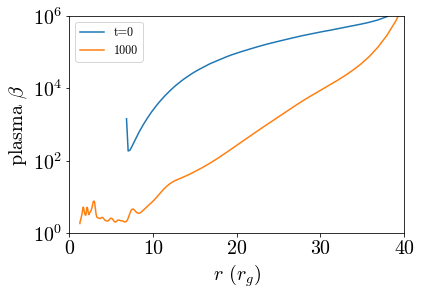

In [35]:
plt.semilogy(r1d,bsq_r_000,label='t=0')
plt.semilogy(r1d,bsq_r_100,label='1000')
plt.xlim(0,xr); plt.ylim(1e-8,1e-2)
plt.legend(fontsize=12)
plt.xlabel(r'$r$ ($r_g$)'); plt.ylabel(r'$b^2$')

plt.figure()
plt.semilogy(r1d,beta_r_000,label='t=0')
plt.semilogy(r1d,beta_r_100,label='1000')
plt.xlim(0,xr); plt.ylim(1.,1e6)
plt.legend(fontsize=12)
plt.xlabel(r'$r$ ($r_g$)'); plt.ylabel(r'plasma $\beta$')

### optional further experiments:
make plots of the accretion rate and beta vs. time<br>
i) transfer all dump files to your scratch space<br>
ii) define lists of mdot, beta, b2<br>
iii) loop over dump files, calculate quantities as we have done so far, append them to lists<br>
iv) make plots vs. time at fixed radius (for beta near 10 r_g, for Mdot near event horizon)<br>
**Q: how do the accretion rate and magnetic field strength grow with time?**

calculate jet power<br>
**Q: does our torus launch a jet?**<br>
check the harmpi_tutorial.md and ask instructors 